In [ ]:
# Step 1: Install necessary libraries
!pip install ultralytics  # Install YOLOv8
!pip install matplotlib opencv-python-headless
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.4/910.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
# Step 2: Import libraries
import matplotlib.pyplot as plt
from ultralytics import YOLO
from google.colab import files
import cv2
import numpy as np




Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="p9AE4cfyWZVtKr7MenmF")
# project = rf.workspace("testingws").project("object-detection-bbaki")
# version = project.version(3)
# dataset = version.download("yolov8")

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="4gEbZ28NJvB2NPSkRws0")
project = rf.workspace("database-alaik").project("deteksi_objek-aic9j")
version = project.version(1)
dataset = version.download("yolov8")







loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to deteksi_objek-1 in yolov8:: 100%|██████████| 170/170 [00:00<00:00, 4928.30it/s]


In [ ]:
import os

# Lihat folder tempat dataset diunduh
dataset_location = dataset.location  # dari RoboFlow download
print("Dataset downloaded to:", dataset_location)

Dataset downloaded to: /content/deteksi_objek-1


In [ ]:
from ultralytics import YOLO

# Buat model YOLOv8 baru
model = YOLO("yolov8n.pt")  # "yolov8n.pt" adalah versi YOLOv8 Nano

# Jalankan pelatihan dengan dataset
model.train(data="/content/deteksi_objek-1/data.yaml", epochs=25, imgsz=320)

Ultralytics 8.3.64 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/deteksi_objek-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

100%|██████████| 755k/755k [00:00<00:00, 14.3MB/s]


Overriding model.yaml nc=80 with nc=9

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/deteksi_objek-1/train/labels... 66 images, 0 backgrounds, 0 corrupt: 100%|██████████| 66/66 [00:00<00:00, 659.82it/s]

train: New cache created: /content/deteksi_objek-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/deteksi_objek-1/valid/labels... 9 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9/9 [00:00<00:00, 1423.35it/s]

val: New cache created: /content/deteksi_objek-1/valid/labels.cache


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 0 dataloader workers
Logging results to runs/detect/train5
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25         0G      2.171      3.868      1.946         11        320: 100%|██████████| 5/5 [00:16<00:00,  3.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.44s/it]

                   all          9         29     0.0109      0.699     0.0705     0.0276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25         0G       2.29      4.011      1.916         14        320: 100%|██████████| 5/5 [00:14<00:00,  3.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all          9         29    0.00976      0.681      0.138     0.0593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25         0G      2.151      3.898      1.806         14        320: 100%|██████████| 5/5 [00:15<00:00,  3.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all          9         29    0.00993      0.755      0.187      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25         0G      2.066      3.837      1.772         12        320: 100%|██████████| 5/5 [00:15<00:00,  3.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all          9         29     0.0102       0.81      0.211      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25         0G      1.926      3.632      1.678          6        320: 100%|██████████| 5/5 [00:14<00:00,  2.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all          9         29     0.0101      0.815      0.204      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25         0G      1.876       3.64      1.653          5        320: 100%|██████████| 5/5 [00:14<00:00,  2.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all          9         29     0.0105      0.829      0.296      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25         0G      1.966      3.366      1.735          4        320: 100%|██████████| 5/5 [00:14<00:00,  2.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all          9         29     0.0104      0.625      0.301      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25         0G      1.961      3.208      1.639         13        320: 100%|██████████| 5/5 [00:14<00:00,  2.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all          9         29     0.0119      0.829      0.326      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25         0G      1.986      3.142      1.632          7        320: 100%|██████████| 5/5 [00:14<00:00,  2.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.04s/it]

                   all          9         29     0.0113      0.713       0.37      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25         0G      1.971      2.927      1.658          7        320: 100%|██████████| 5/5 [00:14<00:00,  2.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all          9         29     0.0114      0.727      0.409      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25         0G      1.799      2.812      1.598         10        320: 100%|██████████| 5/5 [00:14<00:00,  2.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all          9         29      0.933     0.0556      0.421      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25         0G      1.743      2.853       1.54          9        320: 100%|██████████| 5/5 [00:14<00:00,  2.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all          9         29      0.929     0.0556      0.424      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25         0G      1.914      2.693      1.699          4        320: 100%|██████████| 5/5 [00:14<00:00,  2.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all          9         29      0.923     0.0556      0.435      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25         0G      1.875      2.617       1.57          5        320: 100%|██████████| 5/5 [00:14<00:00,  2.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]

                   all          9         29      0.802      0.164      0.429      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25         0G      2.017      2.475      1.639          9        320: 100%|██████████| 5/5 [00:14<00:00,  2.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all          9         29      0.747      0.229       0.45      0.216


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25         0G      2.005       2.31        1.7         12        320: 100%|██████████| 5/5 [00:17<00:00,  3.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all          9         29      0.789      0.313      0.472      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25         0G      1.879      2.196      1.633          3        320: 100%|██████████| 5/5 [00:14<00:00,  2.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all          9         29      0.615      0.314       0.51      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25         0G      1.843      1.895      1.594          2        320: 100%|██████████| 5/5 [00:14<00:00,  2.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all          9         29      0.631      0.361      0.522      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25         0G      1.743      2.151      1.606          4        320: 100%|██████████| 5/5 [00:14<00:00,  2.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all          9         29      0.638      0.441      0.558      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25         0G       1.77      2.074      1.534          3        320: 100%|██████████| 5/5 [00:14<00:00,  2.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all          9         29      0.616      0.463      0.575      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25         0G       1.86      2.001      1.583          4        320: 100%|██████████| 5/5 [00:14<00:00,  2.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all          9         29       0.57        0.5      0.525      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25         0G      1.884      2.211      1.628          2        320: 100%|██████████| 5/5 [00:14<00:00,  2.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]

                   all          9         29      0.604      0.576      0.514      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25         0G      1.729      1.813      1.616          2        320: 100%|██████████| 5/5 [00:14<00:00,  2.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.18s/it]

                   all          9         29      0.589      0.587      0.589       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25         0G      1.867      1.957      1.687          4        320: 100%|██████████| 5/5 [00:14<00:00,  2.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all          9         29      0.599      0.621      0.596      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25         0G      1.658      1.929      1.504          2        320: 100%|██████████| 5/5 [00:14<00:00,  2.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all          9         29      0.617      0.616      0.594       0.32



25 epochs completed in 0.117 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 6.2MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics 8.3.64 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]


                   all          9         29      0.613      0.616      0.581      0.315
                   bus          1          3      0.569      0.667      0.667      0.434
                 mobil          3          9      0.376      0.444      0.382      0.103
                 motor          1          1          1          0     0.0829    0.00829
                perahu          1          1      0.601          1      0.995      0.697
                skuter          6         12      0.674      0.583      0.607      0.292
                  truk          1          3      0.459          1      0.753      0.358
Speed: 0.7ms preprocess, 68.4ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/train5


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 6, 8])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b9f01c052d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

In [ ]:
from ultralytics import YOLO

# Muat model terlatih
model = YOLO("/content/runs/detect/train5/weights/best.pt")


In [ ]:
dataset = version.download("yolov8")

In [ ]:
# result = model.predict(source="/content/gol3.png", save=True, imgsz=320)

image_path = "/content/deteksi_objek-1/test/images/WhatsApp-Image-2025-01-11-at-14_15_54-1-_jpeg.rf.55794a6fec1b6aca66e37077bfbc8db5.jpg"
gray_image_path = "/content/deteksi_objek-1/test/images/WhatsApp-Image-2025-01-11-at-14_15_54-1-_jpeg.rf.55794a6fec1b6aca66e37077bfbc8db5.jpg"

# Baca gambar
image = cv2.imread(image_path)

# Ubah ke grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Simpan gambar grayscale
cv2.imwrite(gray_image_path, gray_image)



result = model.predict(source="/content/deteksi_objek-1/valid/images/WhatsApp-Image-2025-01-11-at-14_16_27-1-_jpeg.rf.b0301cc9df9111bca213fffec6c1ed0d.jpg", imgsz=640, save=True)



image 1/1 /content/deteksi_objek-1/valid/images/WhatsApp-Image-2025-01-11-at-14_16_27-1-_jpeg.rf.b0301cc9df9111bca213fffec6c1ed0d.jpg: 640x640 1 bus, 374.7ms
Speed: 6.5ms preprocess, 374.7ms inference, 6.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


Bounding Box: (469.60, 231.59, 575.90, 497.08)
Confidence: 0.96
Class ID: 0
Total Bounding Boxes: 1


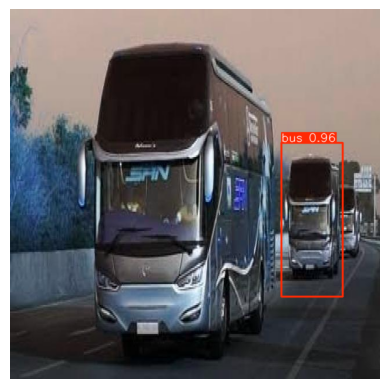

In [ ]:
# Ambil elemen pertama dari hasil prediksi
image_result = result[0]

# Ekstrak bounding box, confidence, dan class
for box in image_result.boxes.data:
    # box adalah tensor [x_min, y_min, x_max, y_max, confidence, class]
    x_min, y_min, x_max, y_max, confidence, class_id = box.tolist()

    # Cetak bounding box
    print(f"Bounding Box: ({x_min:.2f}, {y_min:.2f}, {x_max:.2f}, {y_max:.2f})")
    print(f"Confidence: {confidence:.2f}")
    print(f"Class ID: {int(class_id)}")

# Menghitung jumlah bounding box
total_bounding_boxes = len(image_result.boxes.data)
print(f"Total Bounding Boxes: {total_bounding_boxes}")

# Menampilkan hasil deteksi
from IPython.display import Image, display
image_path_with_predictions = image_result.plot()  # Mengembalikan array gambar

# Tampilkan menggunakan Matplotlib
import matplotlib.pyplot as plt
plt.imshow(image_path_with_predictions)
plt.axis("off")
plt.show()

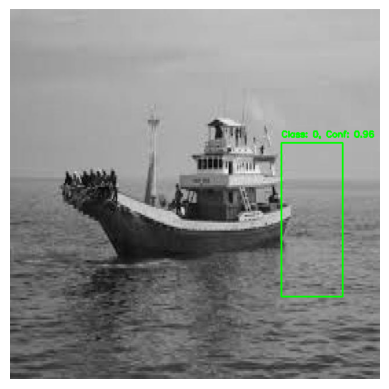

In [ ]:
import cv2

# Buka gambar asli
img = cv2.imread("/content/deteksi_objek-1/valid/images/WhatsApp-Image-2025-01-11-at-14_15_50_jpeg.rf.761c6d24470835366155f21851dc3a9c.jpg")

# Loop untuk menggambar bounding box
for box in image_result.boxes.data:
    x_min, y_min, x_max, y_max, confidence, class_id = box.tolist()
    x_min, y_min, x_max, y_max = int(x_min), int(y_min), int(x_max), int(y_max)

    # Gambar bounding box
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
    label = f"Class: {int(class_id)}, Conf: {confidence:.2f}"
    cv2.putText(img, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Tampilkan gambar dengan Matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


In [ ]:
# Step 3: Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

Saving WhatsApp-Image-2025-01-11-at-14_15_50_jpeg.rf.761c6d24470835366155f21851dc3a9c.jpg to WhatsApp-Image-2025-01-11-at-14_15_50_jpeg.rf.761c6d24470835366155f21851dc3a9c.jpg


In [ ]:
# Step 4: Load YOLO model
model = YOLO('yolov8n.pt')  # Use a pre-trained YOLOv8 model (nano version for speed)

In [ ]:
# Step 5: Perform object detection
results = model(image_path)  # Run inference on the uploaded image


image 1/1 /content/WhatsApp-Image-2025-01-11-at-14_15_50_jpeg.rf.761c6d24470835366155f21851dc3a9c.jpg: 640x640 1 boat, 270.5ms
Speed: 4.0ms preprocess, 270.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
# Step 6: Visualize results
# Save the annotated image
annotated_img = results[0].plot()  # Create an annotated image (numpy array)

In [ ]:
cv2.imwrite("/content/runs/detect/predict/WhatsApp-Image-2025-01-11-at-14_16_27-1-_jpeg.rf.b0301cc9df9111bca213fffec6c1ed0d.jpg", annotated_img)

True

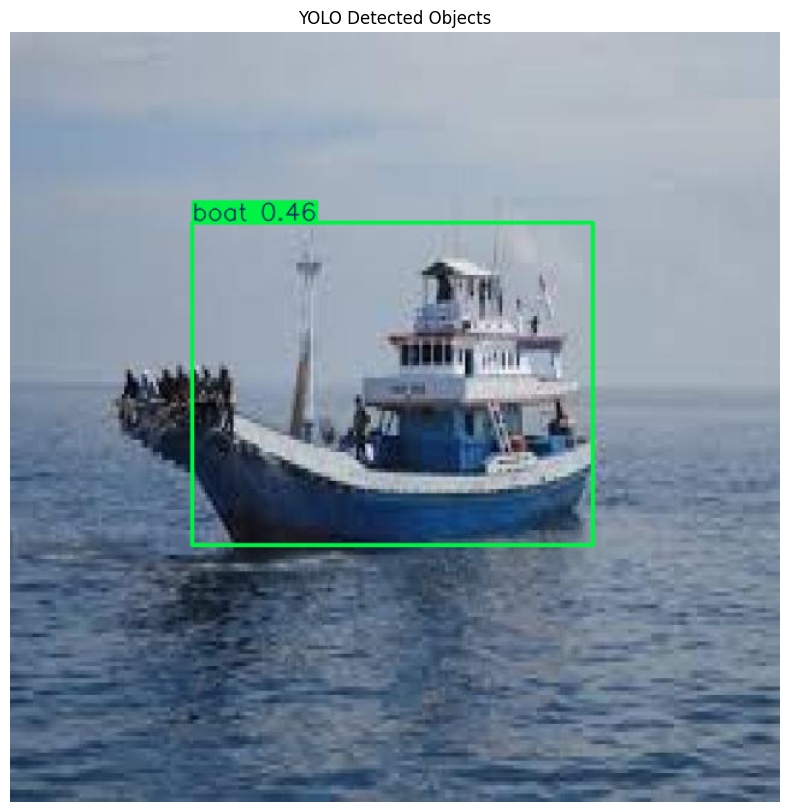

In [ ]:
# Display the annotated image using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("YOLO Detected Objects")
plt.show()